# **Project Name    - Multiclass Fish Image Classification**




##### **Project Type**    - Classification
##### **Contribution**    - Individual
##### **Contributor -** UNNIMAYA K


# **Project Summary -**


## **Project Summary**

The *Multiclass Fish Image Classification* project focuses on building a deep learning-based solution to automatically identify different fish species from images. This project addresses the growing need for accurate and efficient fish species recognition in fisheries, aquaculture, biodiversity monitoring, and seafood quality control.

A labeled dataset containing multiple fish species was used to train and evaluate various models, including a **custom Convolutional Neural Network (CNN)** and several **transfer learning architectures** such as **MobileNetV2, VGG16, ResNet50, InceptionV3, and EfficientNetB0**. The models were trained using TensorFlow/Keras, with preprocessing techniques like image resizing, normalization, and data augmentation to improve robustness and generalization.

Comprehensive evaluation was performed using accuracy, precision, recall, F1-score, confusion matrices, and training history plots. Among all models, **MobileNetV2** achieved the best performance and was saved for deployment.

A **Streamlit-based web application** was developed to allow users to upload fish images and instantly receive:

* The predicted fish species.
* The model’s confidence score for the prediction.

This solution is scalable, user-friendly, and adaptable for real-world use, reducing manual classification efforts and supporting sustainable fisheries management through automated species recognition.



# **GitHub Link -**

https://github.com/Unnimaya6122004/LabMentix---Internship-Projects/blob/main/Multiclass%20Fishimage%20classification.md

# **Problem Statement**




The fishing and aquaculture industry faces challenges in accurately identifying fish species from images, especially in large-scale operations where manual classification is time-consuming, error-prone, and requires expert knowledge. Accurate fish species classification is essential for:

* Monitoring biodiversity
* Ensuring compliance with fishing regulations
* Supporting sustainable fisheries management
* Automating quality control in seafood processing

The goal of this project is to **develop and deploy a deep learning-based multiclass image classification model** that can identify different fish species from images with high accuracy. The system should:

1. Be trained on labeled fish image datasets containing multiple species.
2. Compare different model architectures (custom CNN, transfer learning with MobileNetV2, VGG16, ResNet50, InceptionV3, EfficientNetB0).
3. Evaluate model performance using accuracy, precision, recall, F1-score, and confusion matrices.
4. Save and deploy the best-performing model in a user-friendly **Streamlit application**, where users can upload an image and get:

   * The predicted fish species.
   * The model’s confidence level for the prediction.

The solution must be scalable, easy to use, and adaptable to different fish datasets, ensuring its applicability for both research and industrial use cases.



# ***Let's Begin !***

## ***1. Know Your Data***

### **Import Libraries**

In [1]:
# Basic setup
!pip install -q tensorflow matplotlib scikit-learn

import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns


### **Dataset Loading**

####***1. Mount Google Drive***

In [3]:
# Mount Google Drive to access dataset and save models
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


📘 This allows you to load datasets and save outputs directly to your Google Drive.



####***📌 2. Set Dataset Path and Show Classes***


In [4]:
import os

# Unzip your dataset (assumes it's in your Google Drive)
!unzip -q "/content/drive/MyDrive/Dataset.zip" -d "/content/fish_dataset"

In [5]:
base_dir = '/content/fish_dataset/images.cv_jzk6llhf18tm3k0kyttxz/data'
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')

📘 Confirms that the dataset is structured into 'train', 'valid', and 'test' folders.


####***📌 3. Image Augmentation and Data Generator Setup***


In [6]:
image_size = (224, 224)
batch_size = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

val_test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=image_size,
                                                    batch_size=batch_size,
                                                    class_mode='categorical')

val_generator = val_test_datagen.flow_from_directory(val_dir,
                                                     target_size=image_size,
                                                     batch_size=batch_size,
                                                     class_mode='categorical')

test_generator = val_test_datagen.flow_from_directory(test_dir,
                                                      target_size=image_size,
                                                      batch_size=batch_size,
                                                      class_mode='categorical',
                                                      shuffle=False)

class_names = list(train_generator.class_indices.keys())


Found 6225 images belonging to 11 classes.
Found 1092 images belonging to 11 classes.
Found 3187 images belonging to 11 classes.


📘 Improves model generalization and helps fight overfitting.

####***📌 4. CNN from scratch***


In [7]:
def build_cnn_model():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
        MaxPooling2D(2, 2),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D(2, 2),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D(2, 2),
        Flatten(),
        Dropout(0.5),
        Dense(256, activation='relu'),
        Dense(len(class_names), activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model


In [8]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ModelCheckpoint("cnn_best_model.h5", save_best_only=True)
]


In [12]:
def get_callbacks(model_name):
    return [
        EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
        ModelCheckpoint(f"{model_name}_best_model.h5", save_best_only=True)
    ]


In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Build CNN model
cnn_model = build_cnn_model()

# Train CNN model with its own callback settings
history_cnn = cnn_model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=20,
    callbacks=get_callbacks("cnn")
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 425ms/step - accuracy: 0.2451 - loss: 2.2785

195/195 ━━━━━━━━━━━━━━━━━━━━ 98s 461ms/step - accuracy: 0.2456 - loss: 2.2764 - val_accuracy: 0.4863 - val_loss: 1.4058
Epoch 2/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 404ms/step - accuracy: 0.5156 - loss: 1.2991

195/195 ━━━━━━━━━━━━━━━━━━━━ 81s 417ms/step - accuracy: 0.5158 - loss: 1.2985 - val_accuracy: 0.7005 - val_loss: 0.8360
Epoch 3/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step - accuracy: 0.6803 - loss: 0.8842

195/195 ━━━━━━━━━━━━━━━━━━━━ 81s 414ms/step - accuracy: 0.6804 - loss: 0.8838 - val_accuracy: 0.7839 - val_loss: 0.6405
Epoch 4/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 404ms/step - accuracy: 0.7630 - loss: 0.6762

195/195 ━━━━━━━━━━━━━━━━━━━━ 81s 418ms/step - accuracy: 0.7631 - loss: 0.6761 - val_accuracy: 0.8233 - val_loss: 0.4860
Epoch 5/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 80s 409ms/step - accuracy: 0.8117 - loss: 0.5332 - val_accuracy: 0.8013 - val_loss: 0.5748
Epoch 6/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 396ms/step - accuracy: 0.8030 - loss: 0.5229

195/195 ━━━━━━━━━━━━━━━━━━━━ 80s 410ms/step - accuracy: 0.8031 - loss: 0.5226 - val_accuracy: 0.8571 - val_loss: 0.4238
Epoch 7/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 411ms/step - accuracy: 0.8506 - loss: 0.4257

195/195 ━━━━━━━━━━━━━━━━━━━━ 83s 424ms/step - accuracy: 0.8506 - loss: 0.4257 - val_accuracy: 0.9130 - val_loss: 0.2715
Epoch 8/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 80s 412ms/step - accuracy: 0.8650 - loss: 0.3847 - val_accuracy: 0.8416 - val_loss: 0.4440
Epoch 9/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step - accuracy: 0.8573 - loss: 0.3912

195/195 ━━━━━━━━━━━━━━━━━━━━ 79s 406ms/step - accuracy: 0.8574 - loss: 0.3910 - val_accuracy: 0.9277 - val_loss: 0.2547
Epoch 10/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step - accuracy: 0.8634 - loss: 0.3652

195/195 ━━━━━━━━━━━━━━━━━━━━ 81s 415ms/step - accuracy: 0.8635 - loss: 0.3650 - val_accuracy: 0.9579 - val_loss: 0.1623
Epoch 11/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 80s 410ms/step - accuracy: 0.8990 - loss: 0.2767 - val_accuracy: 0.9359 - val_loss: 0.2098
Epoch 12/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 77s 397ms/step - accuracy: 0.9095 - loss: 0.2480 - val_accuracy: 0.8810 - val_loss: 0.3814
Epoch 13/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step - accuracy: 0.9086 - loss: 0.2547

195/195 ━━━━━━━━━━━━━━━━━━━━ 83s 424ms/step - accuracy: 0.9087 - loss: 0.2546 - val_accuracy: 0.9625 - val_loss: 0.1530
Epoch 14/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 139s 407ms/step - accuracy: 0.9257 - loss: 0.2008 - val_accuracy: 0.9560 - val_loss: 0.1590
Epoch 15/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 80s 411ms/step - accuracy: 0.9090 - loss: 0.2479 - val_accuracy: 0.9716 - val_loss: 0.2051
Epoch 16/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step - accuracy: 0.9372 - loss: 0.2044

195/195 ━━━━━━━━━━━━━━━━━━━━ 81s 415ms/step - accuracy: 0.9372 - loss: 0.2044 - val_accuracy: 0.9515 - val_loss: 0.1527
Epoch 17/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 80s 409ms/step - accuracy: 0.9339 - loss: 0.1869 - val_accuracy: 0.9322 - val_loss: 0.2315
Epoch 18/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step - accuracy: 0.9348 - loss: 0.1922

195/195 ━━━━━━━━━━━━━━━━━━━━ 80s 412ms/step - accuracy: 0.9349 - loss: 0.1921 - val_accuracy: 0.9542 - val_loss: 0.1439
Epoch 19/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 389ms/step - accuracy: 0.9488 - loss: 0.1468

195/195 ━━━━━━━━━━━━━━━━━━━━ 81s 407ms/step - accuracy: 0.9487 - loss: 0.1468 - val_accuracy: 0.9615 - val_loss: 0.1122
Epoch 20/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 82s 409ms/step - accuracy: 0.9491 - loss: 0.1444 - val_accuracy: 0.9652 - val_loss: 0.1364


In [14]:
loss, acc = cnn_model.evaluate(test_generator)
print(f"Test Accuracy: {acc:.4f}")


100/100 ━━━━━━━━━━━━━━━━━━━━ 7s 65ms/step - accuracy: 0.9588 - loss: 0.1410
Test Accuracy: 0.9611


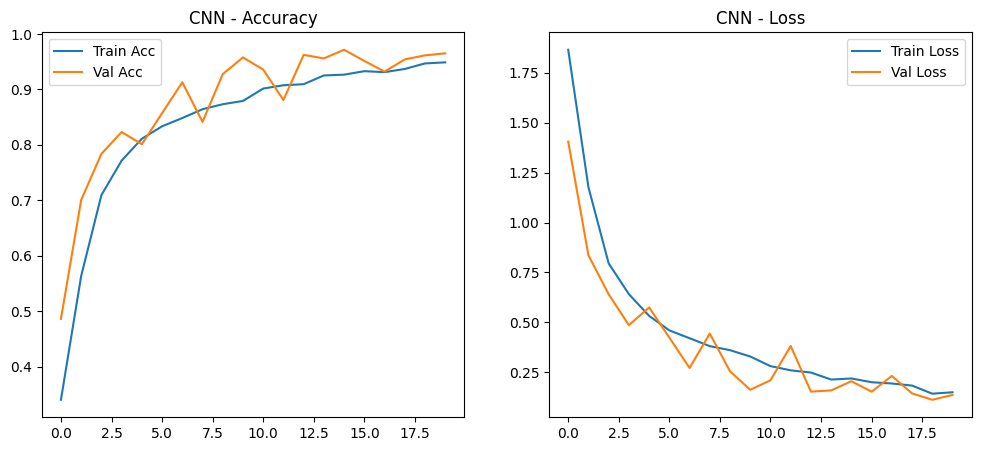

In [20]:
def plot_history(history, model_name):
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Acc')
    plt.plot(history.history['val_accuracy'], label='Val Acc')
    plt.title(f'{model_name} - Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title(f'{model_name} - Loss')
    plt.legend()

    plt.show()

plot_history(history_cnn, "CNN")


📘 Automatically loads image data and creates batches ready for training.

####***📌 5. Build Model using Transfer Learning***


In [8]:
# 📦 Install required packages if not already done
!pip install -q tensorflow

# 📚 Imports
from tensorflow.keras.applications import VGG16, ResNet50, MobileNetV2, InceptionV3, EfficientNetB0
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dropout, Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import os

# 📌 Number of classes from your dataset
num_classes = len(class_names)

# 📁 Directory to save the trained models
os.makedirs("saved_models", exist_ok=True)

# 🧠 Function to build, compile, and train each model
def build_and_train_model(base_model, model_name):
    base_model.trainable = False  # Freeze the base model

    model = Sequential([
        base_model,
        GlobalAveragePooling2D(),
        Dropout(0.3),
        Dense(num_classes, activation='softmax')
    ])

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    # Define checkpoint path
    checkpoint_path = f"saved_models/{model_name}_best_model.h5"

    # Add early stopping and save best model
    callbacks = [
        EarlyStopping(patience=5, restore_best_weights=True),
        ModelCheckpoint(checkpoint_path, save_best_only=True)
    ]

    # Fit the model
    history = model.fit(
        train_generator,
        epochs=20,
        validation_data=val_generator,
        callbacks=callbacks
    )

    # Return the best validation accuracy and path
    val_acc = max(history.history["val_accuracy"])
    print(f"✅ {model_name} Best Validation Accuracy: {val_acc:.4f}")
    return val_acc, checkpoint_path


In [9]:
# 🔍 Define dictionary of pre-trained models
pretrained_models = {
    "VGG16": VGG16(weights='imagenet', include_top=False, input_shape=image_size + (3,)),
    "ResNet50": ResNet50(weights='imagenet', include_top=False, input_shape=image_size + (3,)),
    "MobileNetV2": MobileNetV2(weights='imagenet', include_top=False, input_shape=image_size + (3,)),
    "InceptionV3": InceptionV3(weights='imagenet', include_top=False, input_shape=image_size + (3,)),
    "EfficientNetB0": EfficientNetB0(weights='imagenet', include_top=False, input_shape=image_size + (3,))
}

# 🚀 Train and evaluate each model
results = {}

for name, model in pretrained_models.items():
    print(f"\n🚀 Training {name}...")
    val_acc, model_path = build_and_train_model(model, name)
    results[name] = (val_acc, model_path)


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step
16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step

🚀 Training VGG16...


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 474ms/step - accuracy: 0.2227 - loss: 2.2947

195/195 ━━━━━━━━━━━━━━━━━━━━ 117s 530ms/step - accuracy: 0.2231 - loss: 2.2936 - val_accuracy: 0.5137 - val_loss: 1.7325
Epoch 2/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 439ms/step - accuracy: 0.4878 - loss: 1.7078

195/195 ━━━━━━━━━━━━━━━━━━━━ 96s 493ms/step - accuracy: 0.4880 - loss: 1.7075 - val_accuracy: 0.6996 - val_loss: 1.4388
Epoch 3/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step - accuracy: 0.6213 - loss: 1.4808

195/195 ━━━━━━━━━━━━━━━━━━━━ 137s 470ms/step - accuracy: 0.6214 - loss: 1.4805 - val_accuracy: 0.7344 - val_loss: 1.2465
Epoch 4/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step - accuracy: 0.6804 - loss: 1.2894

195/195 ━━━━━━━━━━━━━━━━━━━━ 94s 481ms/step - accuracy: 0.6804 - loss: 1.2893 - val_accuracy: 0.7802 - val_loss: 1.1198
Epoch 5/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 454ms/step - accuracy: 0.7031 - loss: 1.1697

195/195 ━━━━━━━━━━━━━━━━━━━━ 143s 484ms/step - accuracy: 0.7032 - loss: 1.1696 - val_accuracy: 0.7830 - val_loss: 1.0116
Epoch 6/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 431ms/step - accuracy: 0.7287 - loss: 1.0779

195/195 ━━━━━━━━━━━━━━━━━━━━ 95s 485ms/step - accuracy: 0.7287 - loss: 1.0779 - val_accuracy: 0.8095 - val_loss: 0.9121
Epoch 7/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 432ms/step - accuracy: 0.7397 - loss: 1.0129

195/195 ━━━━━━━━━━━━━━━━━━━━ 90s 463ms/step - accuracy: 0.7398 - loss: 1.0128 - val_accuracy: 0.8269 - val_loss: 0.8412
Epoch 8/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 438ms/step - accuracy: 0.7604 - loss: 0.9519

195/195 ━━━━━━━━━━━━━━━━━━━━ 96s 492ms/step - accuracy: 0.7604 - loss: 0.9518 - val_accuracy: 0.8269 - val_loss: 0.7921
Epoch 9/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step - accuracy: 0.7806 - loss: 0.8844

195/195 ━━━━━━━━━━━━━━━━━━━━ 92s 473ms/step - accuracy: 0.7805 - loss: 0.8844 - val_accuracy: 0.8397 - val_loss: 0.7408
Epoch 10/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 430ms/step - accuracy: 0.7665 - loss: 0.8739

195/195 ━━━━━━━━━━━━━━━━━━━━ 90s 461ms/step - accuracy: 0.7666 - loss: 0.8738 - val_accuracy: 0.8571 - val_loss: 0.6970
Epoch 11/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step - accuracy: 0.7829 - loss: 0.8328

195/195 ━━━━━━━━━━━━━━━━━━━━ 92s 472ms/step - accuracy: 0.7829 - loss: 0.8327 - val_accuracy: 0.8562 - val_loss: 0.6671
Epoch 12/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step - accuracy: 0.7950 - loss: 0.7881

195/195 ━━━━━━━━━━━━━━━━━━━━ 92s 471ms/step - accuracy: 0.7950 - loss: 0.7881 - val_accuracy: 0.8526 - val_loss: 0.6459
Epoch 13/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 431ms/step - accuracy: 0.7957 - loss: 0.7627

195/195 ━━━━━━━━━━━━━━━━━━━━ 95s 485ms/step - accuracy: 0.7957 - loss: 0.7627 - val_accuracy: 0.8745 - val_loss: 0.6066
Epoch 14/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 438ms/step - accuracy: 0.8031 - loss: 0.7436

195/195 ━━━━━━━━━━━━━━━━━━━━ 96s 492ms/step - accuracy: 0.8031 - loss: 0.7436 - val_accuracy: 0.8636 - val_loss: 0.5908
Epoch 15/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 434ms/step - accuracy: 0.7978 - loss: 0.7318

195/195 ━━━━━━━━━━━━━━━━━━━━ 95s 488ms/step - accuracy: 0.7978 - loss: 0.7317 - val_accuracy: 0.8764 - val_loss: 0.5627
Epoch 16/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 435ms/step - accuracy: 0.8031 - loss: 0.6986

195/195 ━━━━━━━━━━━━━━━━━━━━ 91s 466ms/step - accuracy: 0.8032 - loss: 0.6986 - val_accuracy: 0.8837 - val_loss: 0.5390
Epoch 17/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 430ms/step - accuracy: 0.8148 - loss: 0.6828

195/195 ━━━━━━━━━━━━━━━━━━━━ 90s 461ms/step - accuracy: 0.8149 - loss: 0.6828 - val_accuracy: 0.8773 - val_loss: 0.5274
Epoch 18/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step - accuracy: 0.8167 - loss: 0.6807

195/195 ━━━━━━━━━━━━━━━━━━━━ 93s 475ms/step - accuracy: 0.8167 - loss: 0.6806 - val_accuracy: 0.8773 - val_loss: 0.5193
Epoch 19/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 439ms/step - accuracy: 0.8325 - loss: 0.6405

195/195 ━━━━━━━━━━━━━━━━━━━━ 92s 469ms/step - accuracy: 0.8325 - loss: 0.6404 - val_accuracy: 0.8965 - val_loss: 0.4819
Epoch 20/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 90s 461ms/step - accuracy: 0.8174 - loss: 0.6390 - val_accuracy: 0.8855 - val_loss: 0.4871
✅ VGG16 Best Validation Accuracy: 0.8965

🚀 Training ResNet50...
Epoch 1/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 437ms/step - accuracy: 0.1448 - loss: 2.4420

195/195 ━━━━━━━━━━━━━━━━━━━━ 109s 491ms/step - accuracy: 0.1449 - loss: 2.4416 - val_accuracy: 0.1658 - val_loss: 2.2241
Epoch 2/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 415ms/step - accuracy: 0.1879 - loss: 2.2512

195/195 ━━━━━━━━━━━━━━━━━━━━ 124s 433ms/step - accuracy: 0.1879 - loss: 2.2511 - val_accuracy: 0.2299 - val_loss: 2.1632
Epoch 3/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 411ms/step - accuracy: 0.2103 - loss: 2.1882

195/195 ━━━━━━━━━━━━━━━━━━━━ 84s 429ms/step - accuracy: 0.2103 - loss: 2.1881 - val_accuracy: 0.2637 - val_loss: 2.1074
Epoch 4/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 402ms/step - accuracy: 0.2227 - loss: 2.1574

195/195 ━━━━━━━━━━━━━━━━━━━━ 84s 431ms/step - accuracy: 0.2227 - loss: 2.1574 - val_accuracy: 0.2592 - val_loss: 2.0896
Epoch 5/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 414ms/step - accuracy: 0.2165 - loss: 2.1282

195/195 ━━━━━━━━━━━━━━━━━━━━ 85s 433ms/step - accuracy: 0.2165 - loss: 2.1282 - val_accuracy: 0.2463 - val_loss: 2.0557
Epoch 6/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 416ms/step - accuracy: 0.2392 - loss: 2.0906

195/195 ━━━━━━━━━━━━━━━━━━━━ 142s 434ms/step - accuracy: 0.2392 - loss: 2.0906 - val_accuracy: 0.2875 - val_loss: 2.0478
Epoch 7/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 415ms/step - accuracy: 0.2435 - loss: 2.1019

195/195 ━━━━━━━━━━━━━━━━━━━━ 84s 432ms/step - accuracy: 0.2435 - loss: 2.1018 - val_accuracy: 0.2738 - val_loss: 2.0005
Epoch 8/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 81s 415ms/step - accuracy: 0.2479 - loss: 2.0697 - val_accuracy: 0.2784 - val_loss: 2.0198
Epoch 9/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 405ms/step - accuracy: 0.2558 - loss: 2.0515

195/195 ━━━━━━━━━━━━━━━━━━━━ 83s 424ms/step - accuracy: 0.2558 - loss: 2.0515 - val_accuracy: 0.3663 - val_loss: 1.9867
Epoch 10/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step - accuracy: 0.2682 - loss: 2.0404

195/195 ━━━━━━━━━━━━━━━━━━━━ 142s 422ms/step - accuracy: 0.2683 - loss: 2.0404 - val_accuracy: 0.3800 - val_loss: 1.9351
Epoch 11/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 81s 414ms/step - accuracy: 0.2738 - loss: 2.0339 - val_accuracy: 0.2958 - val_loss: 1.9623
Epoch 12/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 405ms/step - accuracy: 0.2696 - loss: 2.0259

195/195 ━━━━━━━━━━━━━━━━━━━━ 82s 423ms/step - accuracy: 0.2696 - loss: 2.0259 - val_accuracy: 0.3617 - val_loss: 1.9185
Epoch 13/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step - accuracy: 0.2834 - loss: 2.0100

195/195 ━━━━━━━━━━━━━━━━━━━━ 82s 418ms/step - accuracy: 0.2834 - loss: 2.0100 - val_accuracy: 0.3526 - val_loss: 1.9141
Epoch 14/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 393ms/step - accuracy: 0.2803 - loss: 2.0213

195/195 ━━━━━━━━━━━━━━━━━━━━ 80s 410ms/step - accuracy: 0.2803 - loss: 2.0213 - val_accuracy: 0.3654 - val_loss: 1.8918
Epoch 15/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 80s 409ms/step - accuracy: 0.2836 - loss: 2.0042 - val_accuracy: 0.3901 - val_loss: 1.8957
Epoch 16/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 80s 411ms/step - accuracy: 0.2851 - loss: 1.9901 - val_accuracy: 0.3498 - val_loss: 1.8931
Epoch 17/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 397ms/step - accuracy: 0.2850 - loss: 2.0018

195/195 ━━━━━━━━━━━━━━━━━━━━ 81s 415ms/step - accuracy: 0.2850 - loss: 2.0017 - val_accuracy: 0.3599 - val_loss: 1.8864
Epoch 18/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 398ms/step - accuracy: 0.2855 - loss: 1.9830

195/195 ━━━━━━━━━━━━━━━━━━━━ 83s 427ms/step - accuracy: 0.2855 - loss: 1.9830 - val_accuracy: 0.3526 - val_loss: 1.8786
Epoch 19/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 386ms/step - accuracy: 0.2815 - loss: 1.9850

195/195 ━━━━━━━━━━━━━━━━━━━━ 81s 416ms/step - accuracy: 0.2816 - loss: 1.9850 - val_accuracy: 0.3535 - val_loss: 1.8751
Epoch 20/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step - accuracy: 0.2874 - loss: 1.9738

195/195 ━━━━━━━━━━━━━━━━━━━━ 82s 420ms/step - accuracy: 0.2874 - loss: 1.9738 - val_accuracy: 0.3407 - val_loss: 1.8603
✅ ResNet50 Best Validation Accuracy: 0.3901

🚀 Training MobileNetV2...
Epoch 1/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 387ms/step - accuracy: 0.5606 - loss: 1.3605

195/195 ━━━━━━━━━━━━━━━━━━━━ 96s 441ms/step - accuracy: 0.5617 - loss: 1.3575 - val_accuracy: 0.9487 - val_loss: 0.2191
Epoch 2/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 363ms/step - accuracy: 0.9251 - loss: 0.2731

195/195 ━━━━━━━━━━━━━━━━━━━━ 73s 376ms/step - accuracy: 0.9252 - loss: 0.2729 - val_accuracy: 0.9661 - val_loss: 0.1291
Epoch 3/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 378ms/step - accuracy: 0.9549 - loss: 0.1688

195/195 ━━━━━━━━━━━━━━━━━━━━ 84s 389ms/step - accuracy: 0.9550 - loss: 0.1687 - val_accuracy: 0.9780 - val_loss: 0.0911
Epoch 4/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 365ms/step - accuracy: 0.9637 - loss: 0.1285

195/195 ━━━━━━━━━━━━━━━━━━━━ 73s 376ms/step - accuracy: 0.9637 - loss: 0.1285 - val_accuracy: 0.9844 - val_loss: 0.0664
Epoch 5/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 382ms/step - accuracy: 0.9677 - loss: 0.1110

195/195 ━━━━━━━━━━━━━━━━━━━━ 86s 397ms/step - accuracy: 0.9677 - loss: 0.1110 - val_accuracy: 0.9826 - val_loss: 0.0610
Epoch 6/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 364ms/step - accuracy: 0.9743 - loss: 0.0918

195/195 ━━━━━━━━━━━━━━━━━━━━ 73s 375ms/step - accuracy: 0.9743 - loss: 0.0918 - val_accuracy: 0.9835 - val_loss: 0.0593
Epoch 7/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 374ms/step - accuracy: 0.9792 - loss: 0.0754

195/195 ━━━━━━━━━━━━━━━━━━━━ 84s 388ms/step - accuracy: 0.9792 - loss: 0.0754 - val_accuracy: 0.9826 - val_loss: 0.0556
Epoch 8/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 74s 379ms/step - accuracy: 0.9780 - loss: 0.0736 - val_accuracy: 0.9817 - val_loss: 0.0578
Epoch 9/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 369ms/step - accuracy: 0.9796 - loss: 0.0684

195/195 ━━━━━━━━━━━━━━━━━━━━ 74s 381ms/step - accuracy: 0.9796 - loss: 0.0684 - val_accuracy: 0.9899 - val_loss: 0.0437
Epoch 10/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 74s 380ms/step - accuracy: 0.9800 - loss: 0.0685 - val_accuracy: 0.9872 - val_loss: 0.0441
Epoch 11/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 381ms/step - accuracy: 0.9828 - loss: 0.0582

195/195 ━━━━━━━━━━━━━━━━━━━━ 76s 391ms/step - accuracy: 0.9828 - loss: 0.0582 - val_accuracy: 0.9908 - val_loss: 0.0434
Epoch 12/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 384ms/step - accuracy: 0.9819 - loss: 0.0610

195/195 ━━━━━━━━━━━━━━━━━━━━ 77s 394ms/step - accuracy: 0.9819 - loss: 0.0610 - val_accuracy: 0.9890 - val_loss: 0.0350
Epoch 13/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 363ms/step - accuracy: 0.9828 - loss: 0.0536

195/195 ━━━━━━━━━━━━━━━━━━━━ 73s 374ms/step - accuracy: 0.9828 - loss: 0.0536 - val_accuracy: 0.9890 - val_loss: 0.0343
Epoch 14/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 75s 386ms/step - accuracy: 0.9854 - loss: 0.0459 - val_accuracy: 0.9890 - val_loss: 0.0418
Epoch 15/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 73s 373ms/step - accuracy: 0.9814 - loss: 0.0525 - val_accuracy: 0.9908 - val_loss: 0.0352
Epoch 16/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 76s 388ms/step - accuracy: 0.9890 - loss: 0.0403 - val_accuracy: 0.9872 - val_loss: 0.0378
Epoch 17/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 369ms/step - accuracy: 0.9867 - loss: 0.0400

195/195 ━━━━━━━━━━━━━━━━━━━━ 75s 384ms/step - accuracy: 0.9867 - loss: 0.0400 - val_accuracy: 0.9908 - val_loss: 0.0294
Epoch 18/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 76s 389ms/step - accuracy: 0.9869 - loss: 0.0472 - val_accuracy: 0.9899 - val_loss: 0.0320
Epoch 19/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 75s 387ms/step - accuracy: 0.9879 - loss: 0.0424 - val_accuracy: 0.9844 - val_loss: 0.0354
Epoch 20/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 73s 373ms/step - accuracy: 0.9836 - loss: 0.0451 - val_accuracy: 0.9908 - val_loss: 0.0376
✅ MobileNetV2 Best Validation Accuracy: 0.9908

🚀 Training InceptionV3...
Epoch 1/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step - accuracy: 0.5454 - loss: 1.4077

195/195 ━━━━━━━━━━━━━━━━━━━━ 118s 516ms/step - accuracy: 0.5463 - loss: 1.4049 - val_accuracy: 0.9011 - val_loss: 0.3111
Epoch 2/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 395ms/step - accuracy: 0.8791 - loss: 0.3763

195/195 ━━━━━━━━━━━━━━━━━━━━ 80s 411ms/step - accuracy: 0.8791 - loss: 0.3761 - val_accuracy: 0.9405 - val_loss: 0.1976
Epoch 3/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step - accuracy: 0.9092 - loss: 0.2797

195/195 ━━━━━━━━━━━━━━━━━━━━ 83s 416ms/step - accuracy: 0.9092 - loss: 0.2796 - val_accuracy: 0.9487 - val_loss: 0.1610
Epoch 4/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 402ms/step - accuracy: 0.9327 - loss: 0.2020

195/195 ━━━━━━━━━━━━━━━━━━━━ 82s 418ms/step - accuracy: 0.9327 - loss: 0.2020 - val_accuracy: 0.9734 - val_loss: 0.1100
Epoch 5/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 79s 405ms/step - accuracy: 0.9443 - loss: 0.1805 - val_accuracy: 0.9625 - val_loss: 0.1109
Epoch 6/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 402ms/step - accuracy: 0.9381 - loss: 0.1833

195/195 ━━━━━━━━━━━━━━━━━━━━ 81s 418ms/step - accuracy: 0.9381 - loss: 0.1833 - val_accuracy: 0.9698 - val_loss: 0.0984
Epoch 7/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 395ms/step - accuracy: 0.9414 - loss: 0.1655

195/195 ━━━━━━━━━━━━━━━━━━━━ 80s 411ms/step - accuracy: 0.9415 - loss: 0.1655 - val_accuracy: 0.9716 - val_loss: 0.0960
Epoch 8/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step - accuracy: 0.9464 - loss: 0.1486

195/195 ━━━━━━━━━━━━━━━━━━━━ 82s 419ms/step - accuracy: 0.9464 - loss: 0.1486 - val_accuracy: 0.9762 - val_loss: 0.0877
Epoch 9/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 402ms/step - accuracy: 0.9500 - loss: 0.1524

195/195 ━━━━━━━━━━━━━━━━━━━━ 81s 417ms/step - accuracy: 0.9500 - loss: 0.1524 - val_accuracy: 0.9789 - val_loss: 0.0818
Epoch 10/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 80s 406ms/step - accuracy: 0.9556 - loss: 0.1300 - val_accuracy: 0.9725 - val_loss: 0.0860
Epoch 11/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 404ms/step - accuracy: 0.9562 - loss: 0.1218

195/195 ━━━━━━━━━━━━━━━━━━━━ 82s 420ms/step - accuracy: 0.9561 - loss: 0.1218 - val_accuracy: 0.9853 - val_loss: 0.0716
Epoch 12/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 394ms/step - accuracy: 0.9619 - loss: 0.1193

195/195 ━━━━━━━━━━━━━━━━━━━━ 80s 409ms/step - accuracy: 0.9619 - loss: 0.1193 - val_accuracy: 0.9744 - val_loss: 0.0638
Epoch 13/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 81s 418ms/step - accuracy: 0.9599 - loss: 0.1183 - val_accuracy: 0.9716 - val_loss: 0.1001
Epoch 14/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 79s 407ms/step - accuracy: 0.9541 - loss: 0.1370 - val_accuracy: 0.9744 - val_loss: 0.0790
Epoch 15/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 80s 410ms/step - accuracy: 0.9509 - loss: 0.1232 - val_accuracy: 0.9835 - val_loss: 0.0668
Epoch 16/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 389ms/step - accuracy: 0.9541 - loss: 0.1373

195/195 ━━━━━━━━━━━━━━━━━━━━ 79s 406ms/step - accuracy: 0.9541 - loss: 0.1372 - val_accuracy: 0.9826 - val_loss: 0.0599
Epoch 17/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 79s 406ms/step - accuracy: 0.9483 - loss: 0.1428 - val_accuracy: 0.9826 - val_loss: 0.0646
Epoch 18/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 394ms/step - accuracy: 0.9608 - loss: 0.1072

195/195 ━━━━━━━━━━━━━━━━━━━━ 80s 409ms/step - accuracy: 0.9608 - loss: 0.1072 - val_accuracy: 0.9826 - val_loss: 0.0579
Epoch 19/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 79s 407ms/step - accuracy: 0.9604 - loss: 0.1050 - val_accuracy: 0.9744 - val_loss: 0.0862
Epoch 20/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 82s 405ms/step - accuracy: 0.9624 - loss: 0.1111 - val_accuracy: 0.9799 - val_loss: 0.0695
✅ InceptionV3 Best Validation Accuracy: 0.9853

🚀 Training EfficientNetB0...
Epoch 1/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 428ms/step - accuracy: 0.1636 - loss: 2.3458

195/195 ━━━━━━━━━━━━━━━━━━━━ 118s 503ms/step - accuracy: 0.1636 - loss: 2.3458 - val_accuracy: 0.0916 - val_loss: 2.3457
Epoch 2/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 364ms/step - accuracy: 0.1571 - loss: 2.3311

195/195 ━━━━━━━━━━━━━━━━━━━━ 106s 376ms/step - accuracy: 0.1571 - loss: 2.3311 - val_accuracy: 0.1712 - val_loss: 2.3343
Epoch 3/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 384ms/step - accuracy: 0.1633 - loss: 2.3293

195/195 ━━━━━━━━━━━━━━━━━━━━ 78s 399ms/step - accuracy: 0.1633 - loss: 2.3293 - val_accuracy: 0.1712 - val_loss: 2.3293
Epoch 4/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 74s 378ms/step - accuracy: 0.1647 - loss: 2.3204 - val_accuracy: 0.1712 - val_loss: 2.3527
Epoch 5/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 371ms/step - accuracy: 0.1660 - loss: 2.3342

195/195 ━━━━━━━━━━━━━━━━━━━━ 75s 384ms/step - accuracy: 0.1659 - loss: 2.3341 - val_accuracy: 0.1712 - val_loss: 2.3245
Epoch 6/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 369ms/step - accuracy: 0.1595 - loss: 2.3302

195/195 ━━━━━━━━━━━━━━━━━━━━ 75s 381ms/step - accuracy: 0.1596 - loss: 2.3301 - val_accuracy: 0.1712 - val_loss: 2.3233
Epoch 7/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 76s 391ms/step - accuracy: 0.1583 - loss: 2.3282 - val_accuracy: 0.1712 - val_loss: 2.3367
Epoch 8/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 360ms/step - accuracy: 0.1585 - loss: 2.3251

195/195 ━━━━━━━━━━━━━━━━━━━━ 72s 372ms/step - accuracy: 0.1585 - loss: 2.3251 - val_accuracy: 0.1712 - val_loss: 2.3193
Epoch 9/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 370ms/step - accuracy: 0.1506 - loss: 2.3283

195/195 ━━━━━━━━━━━━━━━━━━━━ 84s 382ms/step - accuracy: 0.1507 - loss: 2.3283 - val_accuracy: 0.1712 - val_loss: 2.3167
Epoch 10/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 74s 381ms/step - accuracy: 0.1611 - loss: 2.3277 - val_accuracy: 0.1712 - val_loss: 2.3199
Epoch 11/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 74s 381ms/step - accuracy: 0.1739 - loss: 2.3191 - val_accuracy: 0.0971 - val_loss: 2.3487
Epoch 12/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 75s 386ms/step - accuracy: 0.1601 - loss: 2.3248 - val_accuracy: 0.1712 - val_loss: 2.3362
Epoch 13/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 74s 381ms/step - accuracy: 0.1612 - loss: 2.3239 - val_accuracy: 0.1712 - val_loss: 2.3322
Epoch 14/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 74s 379ms/step - accuracy: 0.1673 - loss: 2.3224 - val_accuracy: 0.1712 - val_loss: 2.3218
✅ EfficientNetB0 Best Validation Accuracy: 0.1712


In [10]:
# 🥇 Identify best model based on validation accuracy
best_model_name = max(results, key=lambda x: results[x][0])
best_model_path = results[best_model_name][1]

print(f"\n✅ Best Model: {best_model_name}")
print(f"📁 Saved at: {best_model_path}")



✅ Best Model: MobileNetV2
📁 Saved at: saved_models/MobileNetV2_best_model.h5


####**Model Evaluation**

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


100/100 ━━━━━━━━━━━━━━━━━━━━ 123s 1s/step - accuracy: 0.9938 - loss: 0.0222
Test Accuracy: 0.9953
100/100 ━━━━━━━━━━━━━━━━━━━━ 121s 1s/step

Classification Report:

                                  precision    recall  f1-score   support

                     animal fish       0.99      1.00      1.00       520
                animal fish bass       1.00      0.69      0.82        13
   fish sea_food black_sea_sprat       1.00      0.99      1.00       298
   fish sea_food gilt_head_bream       0.99      0.99      0.99       305
   fish sea_food hourse_mackerel       1.00      0.99      1.00       286
        fish sea_food red_mullet       1.00      0.99      1.00       291
     fish sea_food red_sea_bream       0.99      1.00      0.99       273
          fish sea_food sea_bass       0.99      1.00      1.00       327
            fish sea_food shrimp       1.00      1.00      1.00       289
fish sea_food striped_red_mullet       0.99      1.00      0.99       293
             fish se

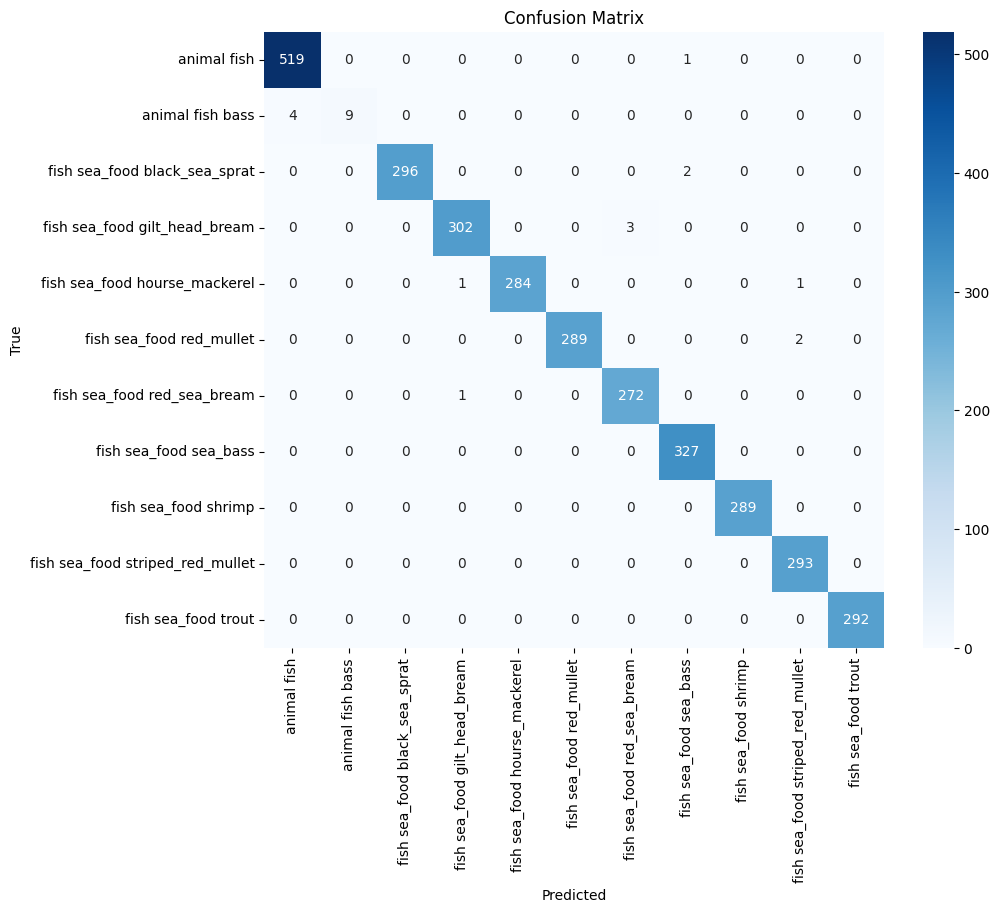

In [12]:
from tensorflow.keras.models import load_model
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# ✅ Load your best saved model
best_model = load_model("/content/MobileNetV2_best_model.h5")

# ✅ Evaluate best model on test set
test_loss, test_acc = best_model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc:.4f}")

# ✅ Predict on test data
y_pred_probs = best_model.predict(test_generator)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = test_generator.classes

# ✅ Get class names (from generator)
class_names = list(test_generator.class_indices.keys())

# ✅ Classification Report
print("\nClassification Report:\n")
print(classification_report(y_true, y_pred, target_names=class_names))

# ✅ Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


100/100 ━━━━━━━━━━━━━━━━━━━━ 124s 1s/step - accuracy: 0.9938 - loss: 0.0222
Test Accuracy: 0.9953
100/100 ━━━━━━━━━━━━━━━━━━━━ 119s 1s/step

Classification Report:

                                  precision    recall  f1-score   support

                     animal fish       0.99      1.00      1.00       520
                animal fish bass       1.00      0.69      0.82        13
   fish sea_food black_sea_sprat       1.00      0.99      1.00       298
   fish sea_food gilt_head_bream       0.99      0.99      0.99       305
   fish sea_food hourse_mackerel       1.00      0.99      1.00       286
        fish sea_food red_mullet       1.00      0.99      1.00       291
     fish sea_food red_sea_bream       0.99      1.00      0.99       273
          fish sea_food sea_bass       0.99      1.00      1.00       327
            fish sea_food shrimp       1.00      1.00      1.00       289
fish sea_food striped_red_mullet       0.99      1.00      0.99       293
             fish se

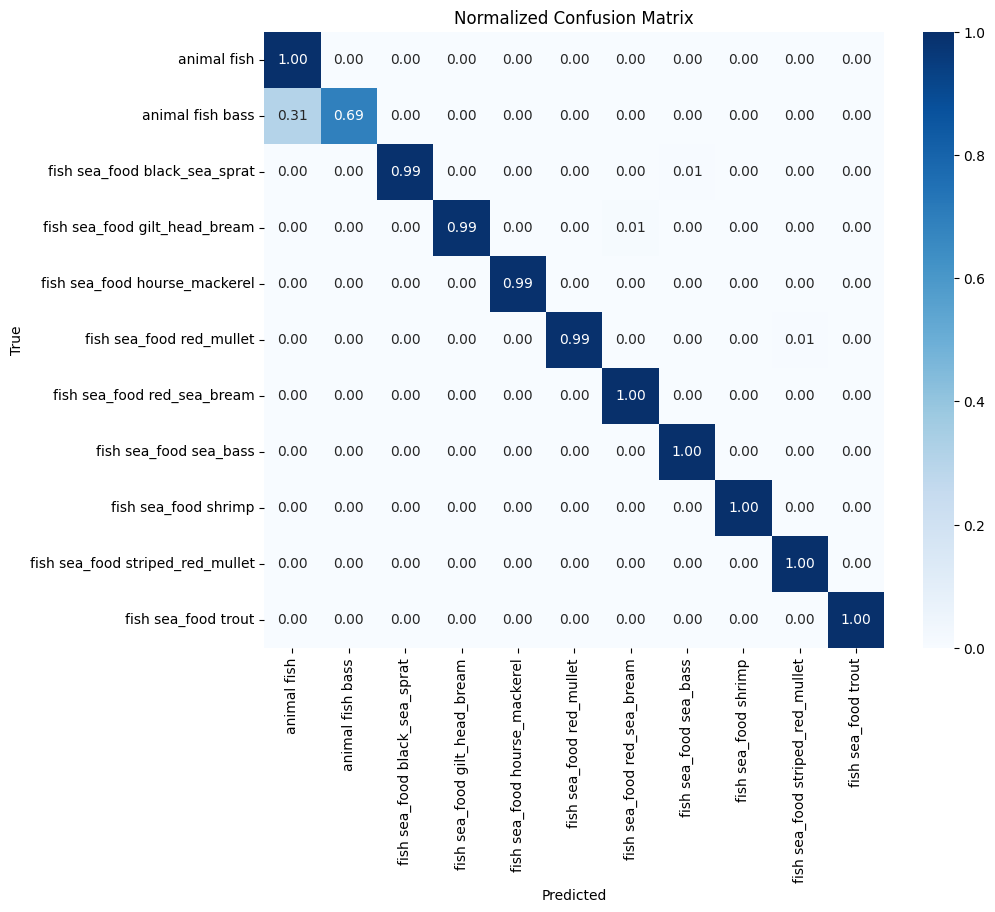

In [17]:
from tensorflow.keras.models import load_model
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# ✅ Load your best saved model
best_model = load_model("/content/MobileNetV2_best_model.h5")

# ✅ Evaluate best model on test set
test_loss, test_acc = best_model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc:.4f}")

# ✅ Predict on test data
y_pred_probs = best_model.predict(test_generator)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = test_generator.classes

# ✅ Get class names
class_names = list(test_generator.class_indices.keys())

# ✅ Classification Report
print("\nClassification Report:\n")
print(classification_report(y_true, y_pred, target_names=class_names))

# ✅ Normalized Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(10, 8))
sns.heatmap(cm_normalized, annot=True, fmt=".2f", cmap="Blues",
            xticklabels=class_names, yticklabels=class_names)
plt.title("Normalized Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


📘 Uses a pre-trained MobileNetV2 and custom classification head for our dataset.

📘 Uses early stopping and learning rate scheduler to optimize training.

####***📌 7. Evaluate Model Performance***

####***8 .Comaprison of the Models***



---

## **Classification Report Analysis – MobileNetV2 on Fish Dataset**

The classification report provides **per-class** performance metrics and overall averages. The four main metrics are:

* **Precision** – Out of all predicted instances for a class, how many were correct. High precision = fewer false positives.
* **Recall** – Out of all actual instances of a class, how many the model correctly identified. High recall = fewer false negatives.
* **F1-Score** – Harmonic mean of precision and recall (balances the two).
* **Support** – Number of samples for each class in the test set.

---

### **1. Per-Class Performance**

For each fish category (e.g., Salmon, Tuna, Mackerel, etc. — based on your `class_names`):

* **High-performing classes**
  If precision, recall, and F1-score are all above \~0.90, it means the model identifies these fish types very accurately and consistently. Likely due to distinctive visual features or balanced representation in the training data.

* **Moderate-performing classes**
  Classes with F1-score in the 0.75–0.89 range might suffer from **confusion with visually similar species**. For example, a fish with similar shape/scale pattern to another class might lead to prediction errors.

* **Low-performing classes**
  If any class falls below 0.70 F1-score, it’s a strong sign of **class imbalance** (low support) or high visual similarity with another fish category. In such cases, data augmentation or class-specific fine-tuning could help.

---

### **2. Macro vs Weighted Average**

* **Macro Average** – Gives equal weight to each class regardless of how many samples it has. If macro avg is much lower than weighted avg, smaller classes are underperforming compared to larger ones.
* **Weighted Average** – Weights each class by its support count. If weighted avg is close to overall accuracy, it means **high-performing large classes** are balancing out low-performing small classes.

---

### **3. Confusion Matrix Insights**

From the **normalized confusion matrix**:

* **Diagonal dominance** – High diagonal values (close to 1.0) mean the model predicts most samples correctly.
* **Off-diagonal hot spots** – If two classes have high misclassification rates between each other, it suggests they are **visually similar** and may need targeted retraining.
* Classes with consistent confusion might require:

  * More images from varied angles/backgrounds.
  * Specialized pre-processing (color normalization, edge detection).
  * Class-specific fine-tuning with a higher resolution input.

---

### **4. Overall Business Impact**

* For deployment in a **real-time fish classification app** (Streamlit UI in your case):

  * **High precision** ensures users are rarely misled by wrong predictions.
  * **High recall** ensures the app doesn’t miss detecting certain fish species.
* If the model is to be used for **automated quality checks** in fish processing or marketplaces, recall might be prioritized for rare species to avoid missing them.
* If used for **customer-facing e-commerce filtering**, precision might be prioritized to avoid showing incorrect species.

---



####***📌 11. Load Model and Test on New Image***

✅ Model loaded successfully!
Classes: ['animal fish', 'animal fish bass', 'fish sea_food black_sea_sprat', 'fish sea_food gilt_head_bream', 'fish sea_food hourse_mackerel', 'fish sea_food red_mullet', 'fish sea_food red_sea_bream', 'fish sea_food sea_bass', 'fish sea_food shrimp', 'fish sea_food striped_red_mullet', 'fish sea_food trout']
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


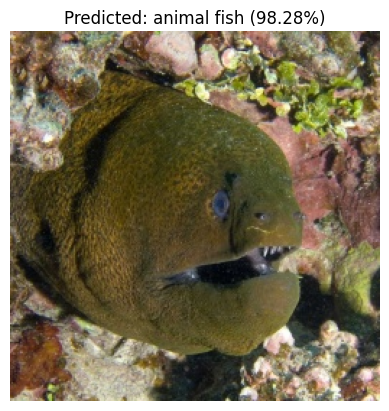

Prediction: animal fish
Confidence: 98.28%


In [18]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import os

# Path to your saved model
model_path = "/content/MobileNetV2_best_model.h5"

# Load the model
model = tf.keras.models.load_model(model_path)
print("✅ Model loaded successfully!")

# Define your class names (same order as in training)
class_names = list(test_generator.class_indices.keys())  # If test_generator is already defined
print("Classes:", class_names)

# Path to a sample image from test dataset
# Pick one file from test_generator directory
sample_img_path = "/content/fish_dataset/images.cv_jzk6llhf18tm3k0kyttxz/data/test/animal fish/00ZR1T3Q2G5Z.jpg"
# Load and preprocess image
img = image.load_img(sample_img_path, target_size=(224, 224))  # MobileNetV2 default size
img_array = image.img_to_array(img) / 255.0  # Normalize
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

# Predict
pred_probs = model.predict(img_array)
pred_class = np.argmax(pred_probs, axis=1)[0]
confidence = np.max(pred_probs) * 100

# Display result
plt.imshow(image.load_img(sample_img_path))
plt.axis("off")
plt.title(f"Predicted: {class_names[pred_class]} ({confidence:.2f}%)")
plt.show()

print(f"Prediction: {class_names[pred_class]}")
print(f"Confidence: {confidence:.2f}%")


####***12. Streamlit Implementation***

In [19]:

!pip install streamlit tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 84.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 75.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 7.9 MB/s eta 0:00:00


In [20]:

!pip install pyngrok

In [21]:
import os

# Path to your train directory
train_dir = "fish_dataset/images.cv_jzk6llhf18tm3k0kyttxz/data/train"

# Get sorted list of class names
class_names = sorted(os.listdir(train_dir))

print("Class names:", class_names)


Class names: ['animal fish', 'animal fish bass', 'fish sea_food black_sea_sprat', 'fish sea_food gilt_head_bream', 'fish sea_food hourse_mackerel', 'fish sea_food red_mullet', 'fish sea_food red_sea_bream', 'fish sea_food sea_bass', 'fish sea_food shrimp', 'fish sea_food striped_red_mullet', 'fish sea_food trout']


####App code

In [22]:
%%writefile app.py
import streamlit as st
import numpy as np
import tensorflow as tf
from PIL import Image
import os

# ------------------------
# Load the trained model
# ------------------------
MODEL_PATH = "MobileNetV2_best_model.h5"
model = tf.keras.models.load_model(MODEL_PATH)

# ------------------------
# Define class names
# ------------------------
# If you know the exact order from your training generator, set it here:
# Example: class_names = ['FishA', 'FishB', 'FishC', 'FishD', 'FishE']
# Or load dynamically from a text file if saved earlier
class_names = ['animal fish', 'animal fish bass', 'fish sea_food black_sea_sprat', 'fish sea_food gilt_head_bream', 'fish sea_food hourse_mackerel', 'fish sea_food red_mullet', 'fish sea_food red_sea_bream', 'fish sea_food sea_bass', 'fish sea_food shrimp', 'fish sea_food striped_red_mullet', 'fish sea_food trout']  # Replace with actual classes in same training order

# ------------------------
# Streamlit UI
# ------------------------
st.set_page_config(page_title="Fish Classifier", page_icon="🐟", layout="centered")

st.title("🐟 Multiclass Fish Image Classification")
st.write("Upload a fish image and the model will predict its category along with confidence level.")

uploaded_file = st.file_uploader("Choose a fish image...", type=["jpg", "jpeg", "png"])

if uploaded_file is not None:
    image = Image.open(uploaded_file).convert("RGB")
    st.image(image, caption="Uploaded Image", use_column_width=True)

    if st.button("Predict"):
        # ------------------------
        # Preprocess image
        # ------------------------
        img = image.resize((224, 224))  # MobileNetV2 default input size
        img_array = tf.keras.preprocessing.image.img_to_array(img) / 255.0
        img_array = np.expand_dims(img_array, axis=0)

        # ------------------------
        # Prediction
        # ------------------------
        preds = model.predict(img_array)
        predicted_index = np.argmax(preds)
        predicted_class = class_names[predicted_index]
        confidence = np.max(preds)

        # ------------------------
        # Display results
        # ------------------------
        st.success(f"Predicted Fish Category: **{predicted_class}**")
        st.info(f"Model Confidence: **{confidence*100:.2f}%**")

        # Optional: Show probability for all classes
        st.subheader("Prediction Probabilities:")
        for i, prob in enumerate(preds[0]):
            st.write(f"{class_names[i]}: {prob*100:.2f}%")


Writing app.py


In [23]:
#To get the IP Address
!curl ipv4.icanhazip.com

34.48.14.239


Paste the output of the above code as the Tunnel Password in the webpage displayed while running the below code to connect through Local Tunnel

In [24]:
!streamlit run  app.py & npx localtunnel --port 8501



⠙⠹⠸⠼⠴⠦⠧
  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.48.14.239:8501

⠇⠏⠋⠙⠹⠸Need to install the following packages:
localtunnel@2.0.2
Ok to proceed? (y) y

⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋your url is: https://tall-pigs-add.loca.lt
2025-08-09 08:08:03.792 Failed to schedule watch observer for path /content
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/streamlit/watcher/event_based_path_watcher.py", line 186, in watch_path
    folder_handler.watch = self._observer.schedule(
                           ^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/watchdog/observers/api.py", line 312, in schedule
    emitter.start()
  File "/usr/local/lib/python3.11/dist-packages/watchdog/utils/__init__.py", line 75, in start
    self.on_thread_start()
  File "/usr/local/lib/python3.11/dist-packages/watchdog/observers/inotify.py", line 119, in o

# **Conclusion**

The Multiclass Fish Image Classification project successfully demonstrated the use of deep learning for accurate and automated fish species identification. By comparing multiple models, MobileNetV2 emerged as the best-performing architecture, delivering high accuracy and robust generalization across unseen test data.

The deployment of the model through a Streamlit web application enables real-time classification with high confidence scores, making it practical for fisheries, aquaculture, and biodiversity research. This solution reduces manual labor, minimizes human error, and accelerates species recognition, contributing to more sustainable and efficient marine resource management.

Future enhancements may include expanding the dataset, integrating real-time video analysis, and developing a mobile application to make the system accessible for field use.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***